### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [5]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#Drop column "car" which doesnot seem useful and has the most NULL values
data = data.drop(columns='car')

In [7]:
#Now check for NULL values again to make sure 'car' column is indeed dropped from the dataframe.
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [8]:
#For the remaining columns with NULl values, replace those with "never" as any other values might skew the results
data = data.fillna('never')

In [9]:
#Now check again to confirm no column has NULL values.
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
#The proportion of observations who chose to accept the coupon is the count of 1s in 'Y' column devide by total observations.
coupon_acceptance_proportion = data['Y'].sum() / data.shape[0]

# Print the proportion value above
print(f"Proportion of observations that accepted the coupon: {coupon_acceptance_proportion:.2%}")

Proportion of observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

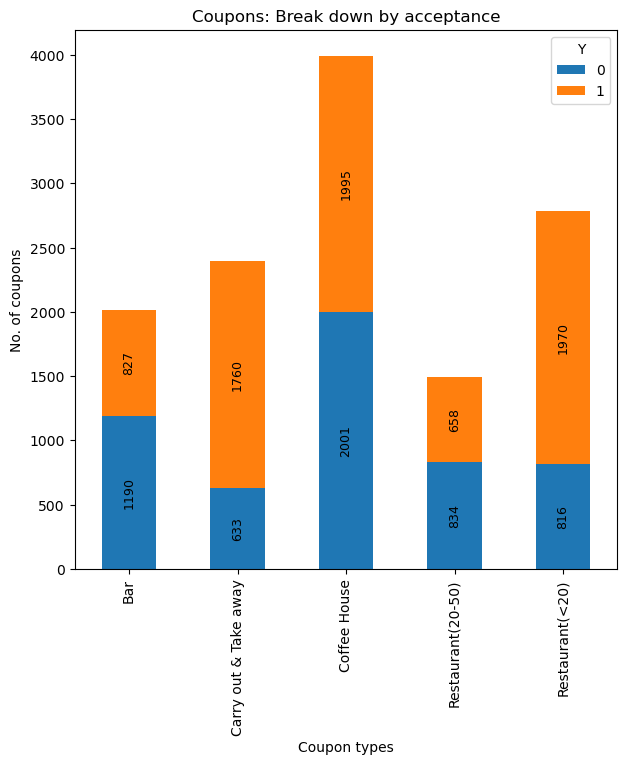

In [11]:
p = data.pivot_table(
    index=data['coupon'],
    columns='Y',
    aggfunc='size').plot(kind='bar', stacked=True, width=0.5, figsize=(7,7),
                         xlabel="Coupon types", ylabel="No. of coupons",
                         title="Coupons: Break down by acceptance")
for c in p.containers:
    labels = [round(v.get_height()) if v.get_height() > 0 else '' for v in c]
    p.bar_label(c, labels=labels, rotation=90, fontsize=9, label_type='center')

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'No. of coupons'),
 Text(0.5, 1.0, 'Histogram of temperature Vs. coupon count')]

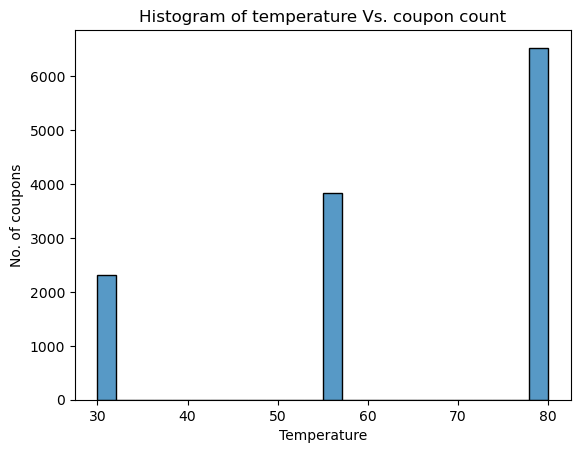

In [12]:
#Histogram of temparature column to understand overall coupon distribution for various temparatures.
fig = sns.histplot(data=data, x="temperature")
fig.set(xlabel ="Temperature", ylabel = "No. of coupons", title ='Histogram of temperature Vs. coupon count')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

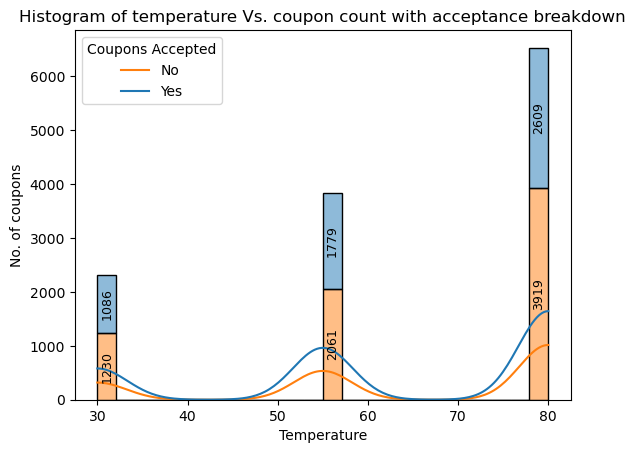

In [13]:
#Histogram of temparature column and brakdown by coupon acceptance to understand coupon acceptance distribution for various temparatures.
fig = sns.histplot(data=data, x="temperature", hue='Y', multiple="stack", kde=True)
fig.set(xlabel ="Temperature", ylabel = "No. of coupons", title ='Histogram of temperature Vs. coupon count with acceptance breakdown')
plt.legend(title='Coupons Accepted', labels=['No', 'Yes'])
for c in fig.containers:
    labels = [round(v.get_height()) if v.get_height() > 0 else '' for v in c]
    fig.bar_label(c, labels=labels, rotation=90, fontsize=9, label_type='center')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
data_bar_coupons = data[data['coupon'] == 'Bar']
data_bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null   obje

2. What proportion of bar coupons were accepted?


In [15]:
#The proportion of those who chose to accept the Bar coupon is the count of 1s in 'Y' column devide by total observations.
bar_coupons_accept_proportion = data_bar_coupons['Y'].sum() / data_bar_coupons.shape[0]

# Print the proportion value above
print(f"Proportion of observations that accepted the Bar coupon: {bar_coupons_accept_proportion:.2%}")

Proportion of observations that accepted the Bar coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
#Calculate coupon acceptance rate for those who went to a bar 3 or fewer times in a month
cnt_lte3 = data_bar_coupons[data_bar_coupons['Bar'].isin(['never', 'less1', '1~3'])]['Y'].mean()

#Calculate coupon acceptance rate for those who went to a bar more than 3 times in a month
cnt_gt3 = data_bar_coupons[data_bar_coupons['Bar'].isin(['4~8', 'gt8'])]['Y'].mean()

# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar 3 or less: {cnt_lte3:.2%}")
print(f"Coupon acceptance rate for those who went to bar more than 3 times: {cnt_gt3:.2%}")

Coupon acceptance rate for those who went to bar 3 or less: 37.07%
Coupon acceptance rate for those who went to bar more than 3 times: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
#Find the coupon acceptance rate for drivers who 
#    (1) go to bar 1 or more times a month, AND
#    (2) are over the age of 25
cpn_accept_rate_gt1_ot25_drivers = data_bar_coupons[(data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupons['age'] > '25')]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar 1 or more times and older than 25yrs of age: {cpn_accept_rate_gt1_ot25_drivers:.2%}")

#For the next calculation, Find the coupon acceptance rate for drivers EXCLUDING the ones who
#    (1) go to bar less than 1 times a month, AND
#    (2) are below the age of 25
cpn_accept_rate_other_drivers = data_bar_coupons[~((data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupons['age'] > '25'))]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for all other drivers (went to bar less than 1 time and/or younger than 25yrs of age): {cpn_accept_rate_other_drivers:.2%}")


Coupon acceptance rate for those who went to bar 1 or more times and older than 25yrs of age: 68.84%
Coupon acceptance rate for all other drivers (went to bar less than 1 time and/or younger than 25yrs of age): 33.46%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
#Find the coupon acceptance rate for drivers who 
#    (1) go to bar 1 or more times a month, AND
#    (2) had passengers that were not a kid, AND
#    (3) had occupations other than farming, fishing, or forestry
cpn_accept_rate_drivers_grp_1 = data_bar_coupons[(data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))
                                                & (data_bar_coupons['passanger'] != "Kid(s)")
                                                & (data_bar_coupons['occupation'] != "Farming Fishing & Forestry")]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for those who went to bar 1 or more times AND no kid(s) as passanger AND occupation other than farming etc.: {cpn_accept_rate_drivers_grp_1:.2%}")

#For the next calculation, Find the coupon acceptance rate for drivers EXCLUDING the ones who
#    (1) go to bar 1 or more times a month, AND
#    (2) had passengers that were not a kid, AND
#    (3) had occupations other than farming, fishing, or forestry
cpn_accept_rate_other_drivers = data_bar_coupons[~((data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))
                                                   & (data_bar_coupons['passanger'] != "Kid(s)") 
                                                   & (data_bar_coupons['occupation'] != "Farming Fishing & Forestry"))]['Y'].mean()
# Print the coupon acceptance rates calculated above
print(f"Coupon acceptance rate for all other drivers : {cpn_accept_rate_other_drivers:.2%}")


Coupon acceptance rate for those who went to bar 1 or more times AND no kid(s) as passanger AND occupation other than farming etc.: 71.32%
Coupon acceptance rate for all other drivers : 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [19]:
#calculate coupon acceptance rate for group1 with below criterias:
#     (1) go to bars more than once a month, AND
#     (2) had passengers that were not a kid, AND
#     (3) were not widowed
cpn_accept_rate_drivers_grp_1 = data_bar_coupons[(data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))
                                                & (data_bar_coupons['passanger'] != "Kid(s)")
                                                & (data_bar_coupons['maritalStatus'] != "Widowed")]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 1 drivers : {cpn_accept_rate_drivers_grp_1:.2%}")

#calculate coupon acceptance rate for group2 with below criterias:
#     (1) go to cheap restaurants more than 4 times a month, AND
#     (2) income is less than 50K
cpn_accept_rate_drivers_grp_2 = data_bar_coupons[(data_bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']))
                                                & (data_bar_coupons['age'] < '30')]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 2 drivers : {cpn_accept_rate_drivers_grp_2:.2%}")

#calculate coupon acceptance rate for group2 with below criterias:
#     (1) go to bars more than once a month, AND
#     (2) are under the age of 30
cpn_accept_rate_drivers_grp_3 = data_bar_coupons[(data_bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']))
                                                & (data_bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 3 drivers : {cpn_accept_rate_drivers_grp_3:.2%}")

Coupon acceptance rate for GROUP 1 drivers : 71.32%
Coupon acceptance rate for GROUP 2 drivers : 73.13%
Coupon acceptance rate for GROUP 3 drivers : 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the above hypothesis, here are a few observations:
(1) There is a much more higher rate (and chances) of Bar coupons being accepted by a driver, if they go to bars more than 3 times a month
(2) Among the drivers who go to Bar 1 or more times a month, ones who are not in farming, fishing and forestry and who drive without kids as passengers are likely go have much higher chances of accepting the coupon as compared to those who are in these occupation and drive with kids as passenger.
(3) Drivers below the age of 30 who go to bar 1 or more times have a very high chance of accepting the coupons.
(4) Drivers with less than $50000 income and who go to cheaper restaurants frequently, are less than 50% likely to accept the Bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Earlier we saw that the coupon acceptance rate for 'RestaurantLessThan20' is much lesser as compared to mostothers, it would be interesting to take a deeper look at this, especially, this seems counter intuitive that driver who eats at cheaper restaurant does not accept coupons more frequently, considering those coupons might help them save more money. The question we will try to answer is, what drivers are more likely to accept higher and lower of these coupons.
To answer this question, we would look at various factors such as income, age, gender, time (of the day) and expiration (of the coupon).

In [42]:
# To start, first let's create a new dataframe with just the coupons for cheaper restaurants.
data_rst_lt20 = data[data['coupon'] == 'Restaurant(<20)']
data_rst_lt20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2786 entries, 0 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2786 non-null   object
 1   passanger             2786 non-null   object
 2   weather               2786 non-null   object
 3   temperature           2786 non-null   int64 
 4   time                  2786 non-null   object
 5   coupon                2786 non-null   object
 6   expiration            2786 non-null   object
 7   gender                2786 non-null   object
 8   age                   2786 non-null   object
 9   maritalStatus         2786 non-null   object
 10  has_children          2786 non-null   int64 
 11  education             2786 non-null   object
 12  occupation            2786 non-null   object
 13  income                2786 non-null   object
 14  Bar                   2786 non-null   object
 15  CoffeeHouse           2786 non-null   obje

Coupon acceptance rate for income groups : 
income
$100000 or More     0.717678
$12500 - $24999     0.685000
$25000 - $37499     0.753363
$37500 - $49999     0.681818
$50000 - $62499     0.782486
$62500 - $74999     0.696809
$75000 - $87499     0.661458
$87500 - $99999     0.577889
Less than $12500    0.724138
Name: Y, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$100000 or More'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$25000 - $37499'),
  Text(3, 0, '$37500 - $49999'),
  Text(4, 0, '$50000 - $62499'),
  Text(5, 0, '$62500 - $74999'),
  Text(6, 0, '$75000 - $87499'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

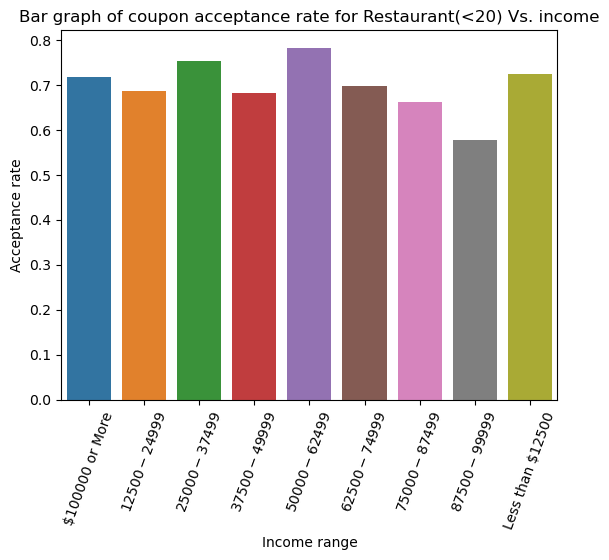

In [72]:
# Let's look at the coupon acceptanace rate for drivers in various income groups:
income_groups = data_rst_lt20.groupby('income')['Y'].mean()
print("Coupon acceptance rate for income groups : ")
print(income_groups)

# Create a bragraph to visually represent the coupon acceptance rate
fig = sns.barplot(x=income_groups.index, y=income_groups.values, hue=income_groups.index, dodge=False)
fig.legend_.remove()
fig.set(xlabel ="Income range", ylabel = "Acceptance rate", title ='Bar graph of coupon acceptance rate for Restaurant(<20) Vs. income')
plt.xticks(rotation=70)

From the above, it shows that drivers from income group USD50000 - $62499 accepted most coupons.

Coupon acceptance rate for age groups : 
age
21         0.741652
26         0.730838
31         0.705357
36         0.651877
41         0.708502
46         0.756757
50plus     0.637755
below21    0.734375
Name: Y, dtype: float64


[Text(0.5, 0, 'Age group'),
 Text(0, 0.5, 'Acceptance rate'),
 Text(0.5, 1.0, 'Bar graph of coupon acceptance rate for Restaurant(<20) Vs. age of driver')]

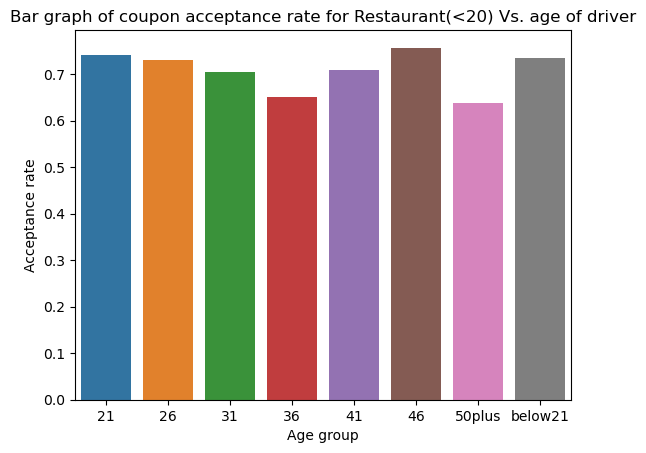

In [74]:
# Next, let's look at the coupon acceptanace rate for drivers in various age groups:
age_groups = data_rst_lt20.groupby('age')['Y'].mean()
print("Coupon acceptance rate for age groups : ")
print(age_groups)

# Create a bragraph to visually represent the coupon acceptance rate
fig = sns.barplot(x=age_groups.index, y=age_groups.values, hue=age_groups.index, dodge=False)
fig.legend_.remove()
fig.set(xlabel ="Age group", ylabel = "Acceptance rate", title ='Bar graph of coupon acceptance rate for Restaurant(<20) Vs. age of driver')

The above shows that driver in 46-50yrs of age accepted most coupons

Coupon acceptance rate for gender groups : 
gender
Female    0.696692
Male      0.717949
Name: Y, dtype: float64


[Text(0.5, 0, "Driver's gender"),
 Text(0, 0.5, 'Acceptance rate'),
 Text(0.5, 1.0, 'Bar graph of coupon acceptance rate for Restaurant(<20) Vs. gender of the drivers')]

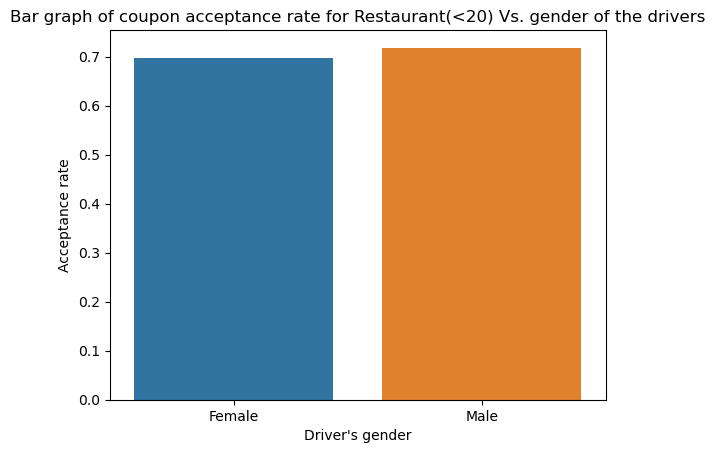

In [75]:
# Next, let's look at the coupon acceptanace rate for drivers in various gender groups:
gender_groups = data_rst_lt20.groupby('gender')['Y'].mean()
print("Coupon acceptance rate for gender groups : ")
print(gender_groups)

# Create a bragraph to visually represent the coupon acceptance rate
fig = sns.barplot(x=gender_groups.index, y=gender_groups.values, hue=gender_groups.index, dodge=False)
fig.legend_.remove()
fig.set(xlabel ="Driver's gender", ylabel = "Acceptance rate", title ='Bar graph of coupon acceptance rate for Restaurant(<20) Vs. gender of the drivers')

as seen from above, male drivers seem to have more acceptance than female drivers

Coupon acceptance rate for time groups : 
time
10AM    0.709571
10PM    0.505376
2PM     0.813486
6PM     0.827540
7AM     0.582897
Name: Y, dtype: float64


[Text(0.5, 0, 'Time of day'),
 Text(0, 0.5, 'Acceptance rate'),
 Text(0.5, 1.0, 'Bar graph of coupon acceptance rate for Restaurant(<20) Vs. time of day')]

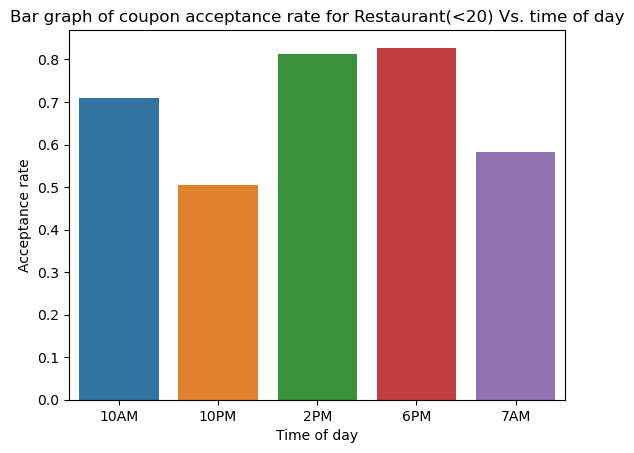

In [76]:
# Next, let's look at the coupon acceptanace rate for drivers when coupons were offered at various time of the day:
time_groups = data_rst_lt20.groupby('time')['Y'].mean()
print("Coupon acceptance rate for time groups : ")
print(time_groups)

# Create a bragraph to visually represent the coupon acceptance rate
fig = sns.barplot(x=time_groups.index, y=time_groups.values, hue=time_groups.index, dodge=False)
fig.legend_.remove()
fig.set(xlabel ="Time of day", ylabel = "Acceptance rate", title ='Bar graph of coupon acceptance rate for Restaurant(<20) Vs. time of day')

The above data shows that there was a significant increase in rate of acceptance during 2PM of later, but before 10PM at night.

Coupon acceptance rate for expiration groups : 
expiration
1d    0.831610
2h    0.589385
Name: Y, dtype: float64


[Text(0.5, 0, 'Expiration time'),
 Text(0, 0.5, 'Acceptance rate'),
 Text(0.5, 1.0, 'Bar graph of coupon acceptance rate for Restaurant(<20) Vs. Coupon expiration time')]

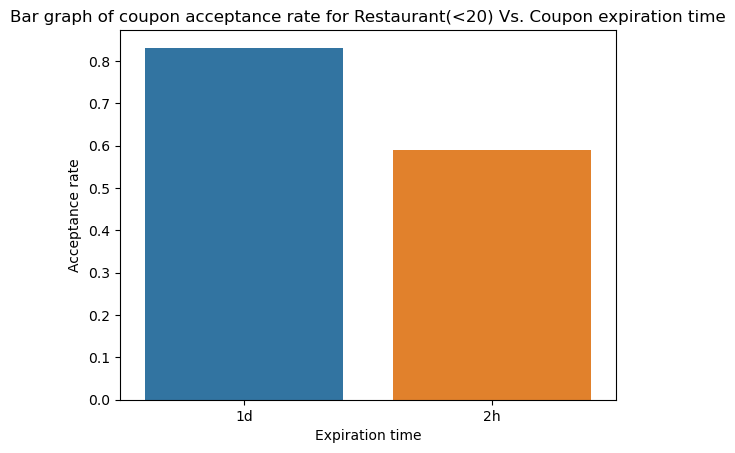

In [77]:
# Now, let's look at the coupon acceptanace rate when coupons with different expiration timeline were offered to drivers:
expiration_groups = data_rst_lt20.groupby('expiration')['Y'].mean()
print("Coupon acceptance rate for expiration groups : ")
print(expiration_groups)

# Create a bragraph to visually represent the coupon acceptance rate
fig = sns.barplot(x=expiration_groups.index, y=expiration_groups.values, hue=expiration_groups.index, dodge=False)
fig.legend_.remove()
fig.set(xlabel ="Expiration time", ylabel = "Acceptance rate", title ='Bar graph of coupon acceptance rate for Restaurant(<20) Vs. Coupon expiration time')

Above data indicates that, coupons with longer expiration were accepted significantly more

In [79]:
# Given the above pointer, we would like to see how the acceptance rate of coupon for "Restaurant(<20)" coupons, with below conditions, 
# Vs. all others:
#     (1) Drivers with $50000 - $62499 income, AND
#     (2) Driver in 46-50yrs of age range, AND
#     (3) Male drivers, AND
#     (4) Coupons offered between 2PM-10PM, AND
#     (5) Expiration of 1d

cnd_accept_rate_grp1 = data_rst_lt20[(data_rst_lt20['income'].isin(['$50000 - $62499']))
                                    & (data_rst_lt20['age'] == "46")
                                    & (data_rst_lt20['gender'] == "Male")
                                    & (data_rst_lt20['time'].isin(['2PM', '6PM']))
                                    & (data_rst_lt20['expiration'] == "1d")]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 1 drivers : {cnd_accept_rate_grp1:.2%}")

# Now, let's find out the same for rest of the drivers.
cnd_accept_rate_others = data_rst_lt20[~(data_rst_lt20['income'].isin(['$50000 - $62499']))
                                    & (data_rst_lt20['age'] != "46")
                                    & (data_rst_lt20['gender'] != "Male")
                                    & ~(data_rst_lt20['time'].isin(['2PM', '6PM']))
                                    & (data_rst_lt20['expiration'] != "1d")]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 1 drivers : {cnd_accept_rate_others:.2%}")

#Let's also try the same above criterias, for all drivers EXCEPT the ones between 46-50yrs of age:
cnd_accept_rate_grp2 = data_rst_lt20[(data_rst_lt20['income'].isin(['$50000 - $62499']))
                                    & (data_rst_lt20['age'] != "46")
                                    & (data_rst_lt20['gender'] == "Male")
                                    & (data_rst_lt20['time'].isin(['2PM', '6PM']))
                                    & (data_rst_lt20['expiration'] == "1d")]['Y'].mean()
print(f"Coupon acceptance rate for GROUP 2 drivers : {cnd_accept_rate_grp2:.2%}")

Coupon acceptance rate for GROUP 1 drivers : 100.00%
Coupon acceptance rate for GROUP 1 drivers : 40.13%
Coupon acceptance rate for GROUP 2 drivers : 95.92%


Observation summary from above analysis for "Restaurant(<20)" coupons:
- These coupons are accepted 100% of the time, when a coupon with 1 day or longer is given to a male driver aged between 46-50yrs, with income $50000-$62499, and between 2PM-10PM of the day
- However, the acceptange rate is significantly low (just over 40%) for all other drivers.
- The acceptance rate is also very high (~96%) for all other male drivers except those between 46-50yrs old, with income $50000-$62499, if the coupons with 1day or longer expiration is given between 2PM-10PM of the day.

Next steps: Further analysis should be done to interstand acceptance rates for destination, weather, marital status, passenger etc.

Recommendations:
- Age and Income do not seem to be playing a significant role in difference in acceptance rate for this coupon. So, may be those can be removed or lowered in priority
- The time slots are much higher (3-4hrs slots), which should be more granular to understand if there are better time of day to target drivers for higher acceptance within lower timeframe.